In [1]:
import os
import json
import re

dataLocation = "../data/"

wordpress = "wordpress"
quasigroup = "quasigroup"
tournament = "tournament"
mspsp = "mspsp"
cvrptw = "cvrptw"
roster = "roster"
quasigroupOcc = "quasigroupOcc"


optimisations = ["O0_S0", "O2_S0", "O2_S1", "O3_S0", "O3_S1"]
# optimisations = ["O2_S0", "O2_S1", "O3_S0", "O3_S1"]
problems = [wordpress, quasigroup, quasigroupOcc, tournament, mspsp, cvrptw, roster]
# problems = [wordpress, quasigroup, mspsp, roster]


# origin = "../data/wordpress"
# origin = "../data/quasigroup"
# isWordpress = 'wordpress' in origin
eprimePath = "/eprime"
minizincPath = "/minizinc"

def extractNumbers(x):
    temp = re.findall(r'\d+', x)
    temp = list(map(int, temp))
    return temp[0]

def getData(path, isEprime, pullNums):
    res = []
    for entry in os.scandir(path):
        if os.path.isdir(entry):
            continue
        f = open(entry)
        data = json.load(f)
        fullFileName = os.path.basename(entry)
        extractedFileName = fullFileName.split('.')[0]
        if isEprime:
            data = processEprime(data)
        if pullNums:
            extractedFileName = extractNumbers(extractedFileName)
        if data["timeout"]:
            data["solveTime"] = timeoutTimeSecs
            data["time"] = timeoutTimeSecs
        res.append((extractedFileName, data))
        f.close()
    return res

def processEprime(data):
    d = {}
    d["time"] = data['SolverTotalTime'] + data['SavileRowTotalTime']
    d["solveTime"] = data['SolverTotalTime']
    d["initTime"] = data['SavileRowTotalTime']
    d["timeout"] = data['SolverTimeOut'] == 1

    return d
    
# hypothesis the generated data is supported by Eprime search given instances were found using Eprime

timeoutTimeSecs = 600

eprimeData = {}
eprimeCseData = {}
minizincData = {}

for i in problems:
    isWordpress = 'wordpress' in i
    problemLocation = dataLocation + i
    opt = {}
    for j in optimisations:
        opt[j] = getData(problemLocation + eprimePath + "/" + j, True, isWordpress)
    eprimeData[i] = opt
    minizincData[i] =  getData(problemLocation + minizincPath, False, isWordpress)

# print(eprimeData)
# eprimeData = getData(origin + eprimePath, True, isWordpress)
# eprimeCseData = getData(origin + eprimeXCSE, True, isWordpress)
# miniZincData = getData(origin + minizincPath, False, isWordpress)





set()
set()


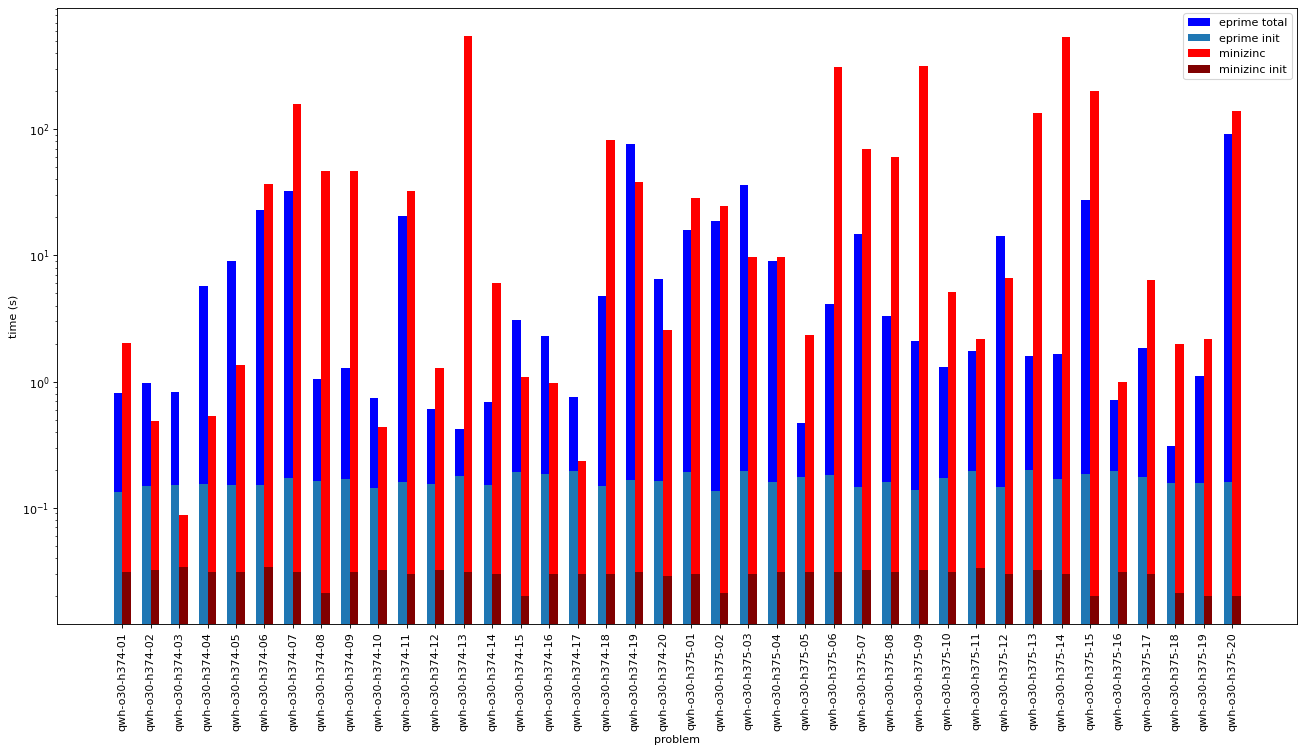

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from functools import cmp_to_key

def getData(dataToExtract):
    # print(dataToExtract)
    xData, yData = zip(*sorted(dataToExtract))
    yTime =  list(map(lambda x : x["time"], yData))
    yInit = list(map(lambda x : x["initTime"], yData))
    ySolverTime = list(map(lambda x : x["solveTime"], yData))
    yCompleted = list(map(lambda x : x["timeout"], yData))
    return (xData, yTime, ySolverTime, yInit, yCompleted)



eprimeX, eprimeTime, eprimeSolverTime, eprimeInit, eprimeCompleted = getData(eprimeData[quasigroup]["O0_S0"])
minizincX, minizincTime, minizincSolverTime, minizincInit, minizincCompleted = getData(minizincData[quasigroup])
# minizincX, minizincTime, minizincInit, minizincCompleted = getData(eprimeData[quasigroup]["O0_S0"])
# eprimeCseX, eprimeCseTime, eprimeCseInit = getData(eprimeCseData[wordpress])

print(set(minizincX).difference(set(eprimeX)))
print(set(eprimeX).difference(set(minizincX)))
# print(len(eprimeX))
# print(len(minizincX))

# if isWordpress:
eprimeX = list(map(str, eprimeX))
minizincX = list(map(str, minizincX))

ind = np.arange(len(eprimeX))
width = 0.3

figure(figsize=(20, 10), dpi=80)
# plt.bar(ind-width, eprimeCseTime, width, label="eprime x-cse total", color="blue")
# plt.bar(ind-width, eprimeCseInit, width, label="eprime x-cse init")
plt.bar(ind, eprimeTime, width, label="eprime total", color="blue")
plt.bar(ind, eprimeInit, width, label="eprime init")
plt.bar(ind+width, minizincTime, width, label="minizinc", color="red")
plt.bar(ind+width, minizincInit, width, label="minizinc init" , color="maroon")
# plt.scatter(eprimeX, eprimeY, label="eprime")
# plt.scatter(minizincX, minizincY, label="minizinc")
plt.legend(loc="best")
plt.xticks(ind+width/2, minizincX)
plt.xticks(rotation = 90)
plt.xlabel("problem")
plt.ylabel("time (s)")
plt.yscale("log")

wordpress
quasigroup
quasigroupOcc
tournament
mspsp
cvrptw
roster


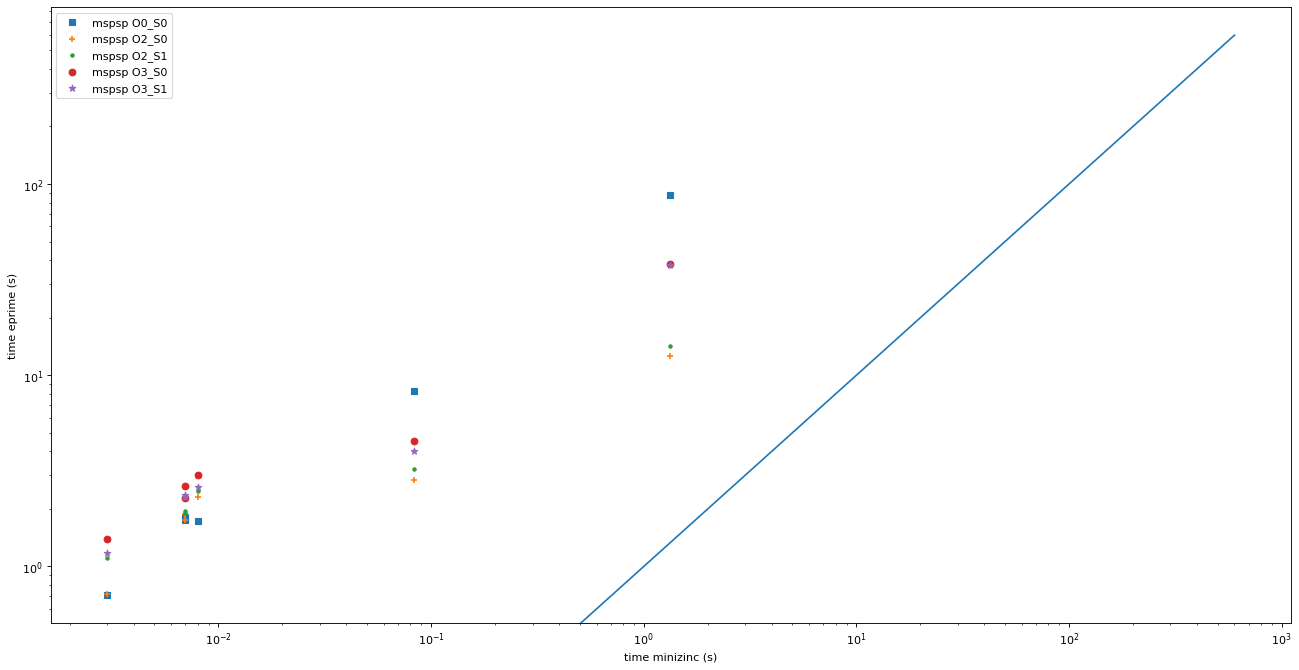

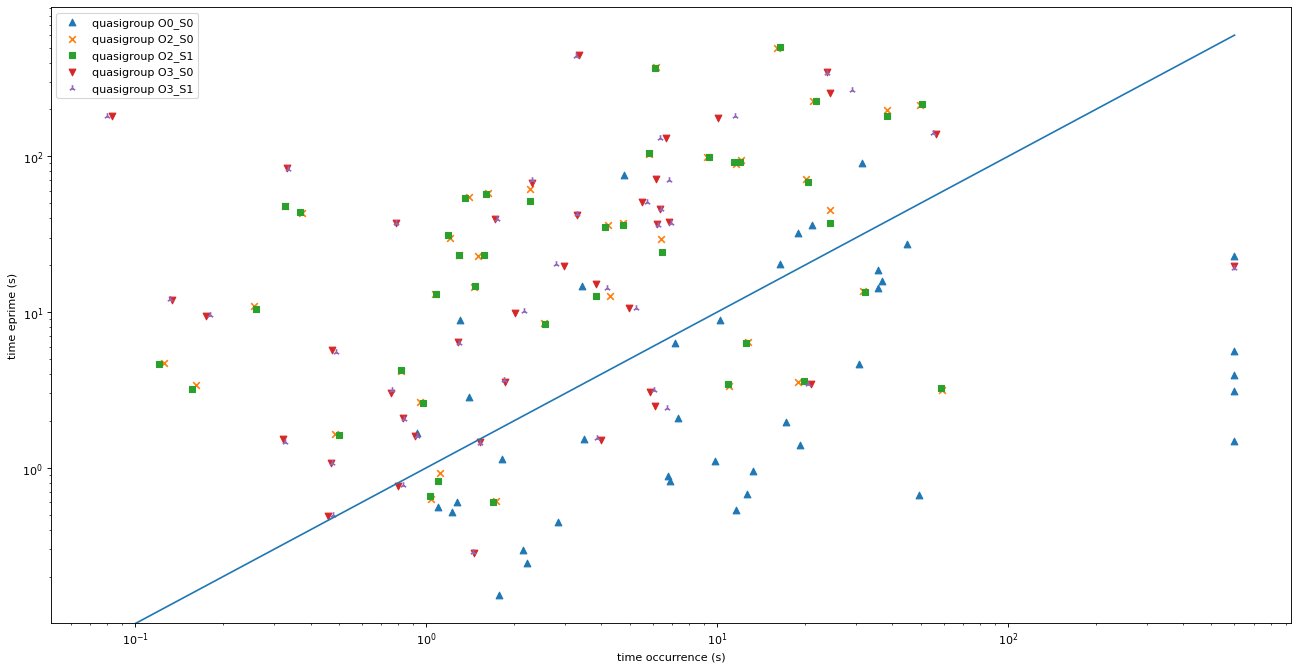

In [40]:
import itertools

allEprimeTimings = {}
allMinizincTimings = {}

problemIndex = 0
timingIndex = 1
solverTimeIndex = 2
initIndex = 3
timeoutIndex = 4

for i in problems:
    print(i)
    allMinizincTimings[i] = getData(minizincData[i])
    allEprimeTimings[i] = {}
    for j in optimisations:
        allEprimeTimings[i][j] = getData(eprimeData[i][j])

marker = itertools.cycle((',', '+', '.', 'o', '*', '^', 'x', 's', 'v','2', 'd', 'H', 'X'))

# for i in problems:
#     plt.scatter(allMinizincTimings[i][timingIndex], allMinizincTimings[i][timingIndex], label="minizinc_"+i)
#     for j in optimisations:
#         plt.scatter(allEprimeTimings[i][j][timingIndex], allEprimeTimings[i][j][timingIndex], label=i + "_" + j)

def setupPlotSolverSolver():
    figure(figsize=(20, 10), dpi=80)
    plt.plot([0, timeoutTimeSecs], [0, timeoutTimeSecs])
    plt.xlabel("time minizinc (s)")
    plt.ylabel("time eprime (s)")
    plt.yscale("log")
    plt.xscale("log")

# wordpress timingIndex, timing out
# tournament timingIndex, notably only 20f, 20h
# roster timingIndex, timing out
# cvrptw everything times out
# mspsp out-performed by minizinc on init and solver time
# quasigroup, all over the place

def createOccurencePlot(opt):
    indexOfInterest = solverTimeIndex
    occEssenceProblem = allEprimeTimings[quasigroupOcc][opt]
    essenceProblem = allEprimeTimings[quasigroup][opt]
    x, y = occEssenceProblem[indexOfInterest], essenceProblem[indexOfInterest]
    plt.xlabel("time occurrence (s)")
    plt.scatter(x, y, label= quasigroup + " " + opt, marker=next(marker))

def createPlot(opt):
    indexOfInterest = timingIndex
    # for i in problems:
    for i in [mspsp]:
        minizincProblem = allMinizincTimings[i]
        essenceProblem = allEprimeTimings[i][opt]
        # print(set(allMinizincTimings[i][problemIndex]).difference(set(allEprimeTimings[i][opt][problemIndex])))
        # print(set(allEprimeTimings[i][opt][problemIndex]).difference(set(allMinizincTimings[i][problemIndex])))
        x, y = minizincProblem[indexOfInterest], essenceProblem[indexOfInterest]
        plt.scatter(x, y, label= i + " " + opt, marker=next(marker))
        
        # for j in range(len(minizincProblem[problemIndex])):
        #     plt.annotate(minizincProblem[problemIndex][j], (minizincProblem[indexOfInterest][j], essenceProblem[indexOfInterest][j]))

setupPlotSolverSolver()
for j in optimisations:
    createPlot(j)
plt.legend(loc="best")

setupPlotSolverSolver()
for j in optimisations:
    createOccurencePlot(j)
plt.legend(loc="best")


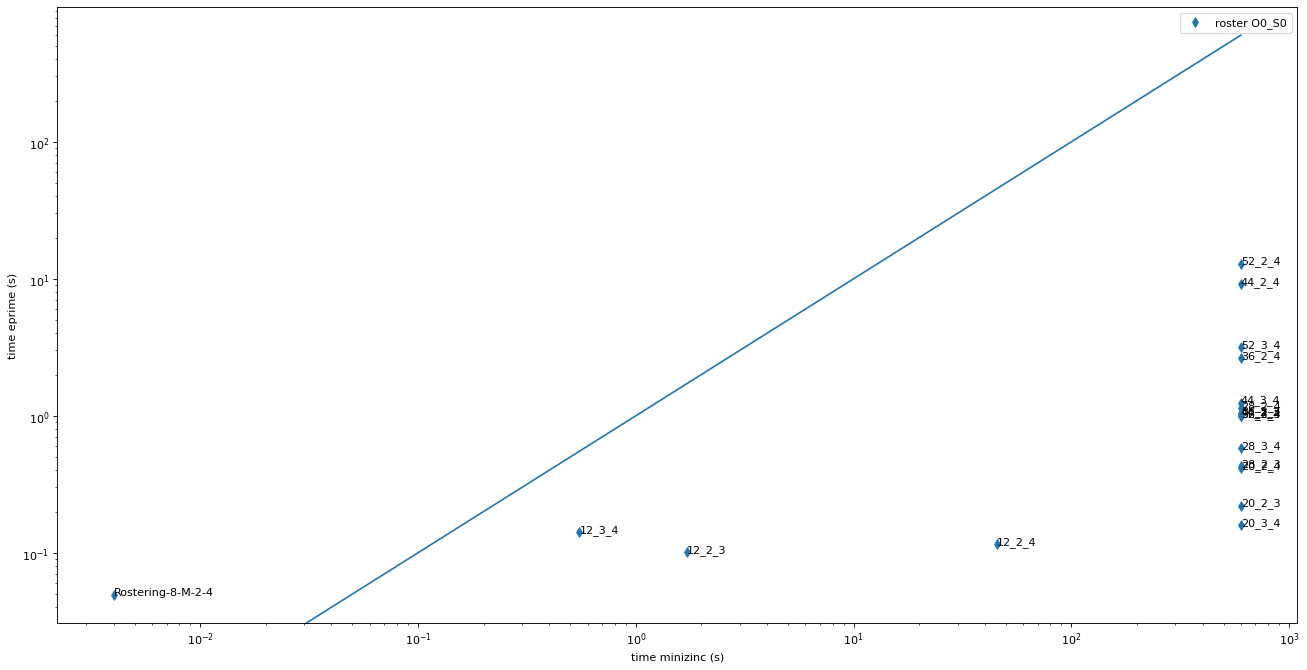

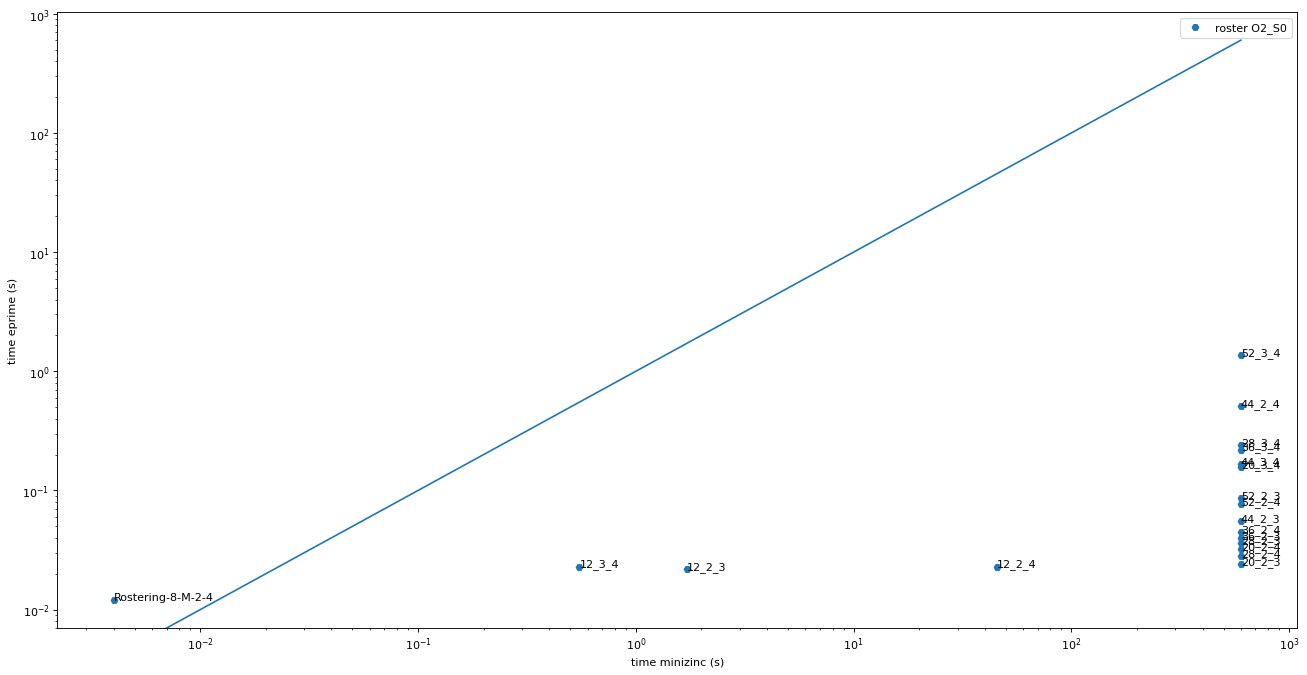

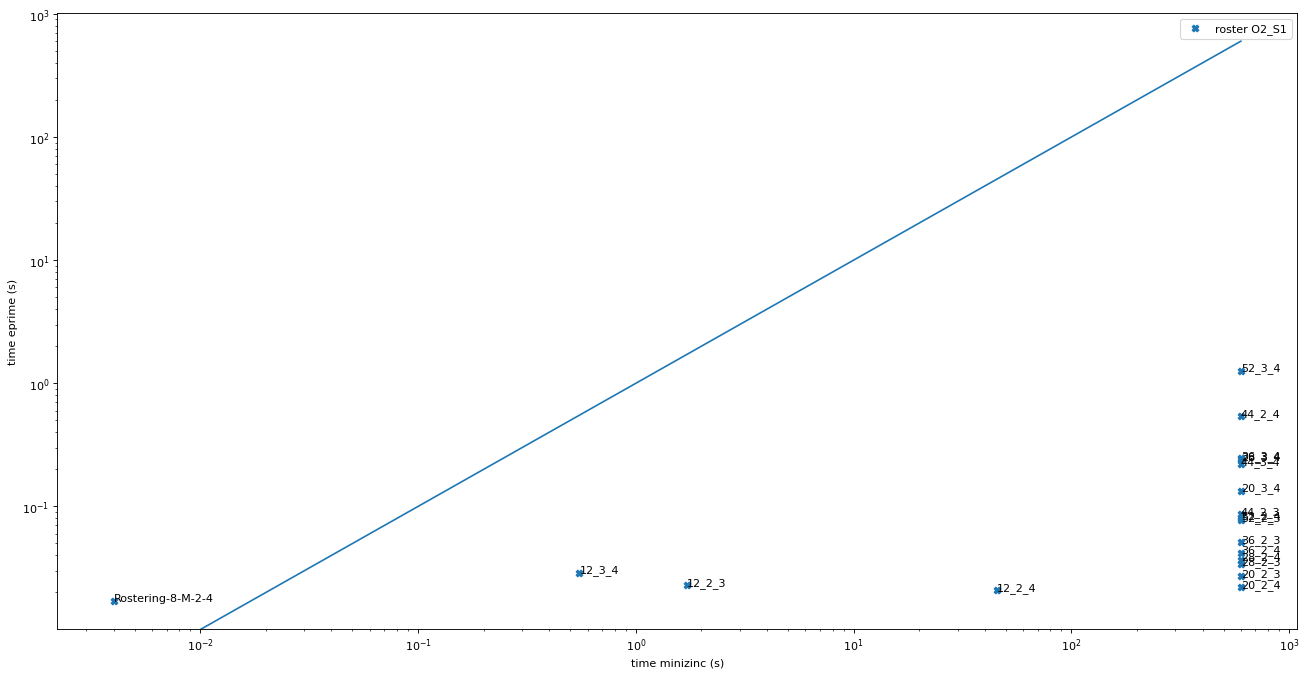

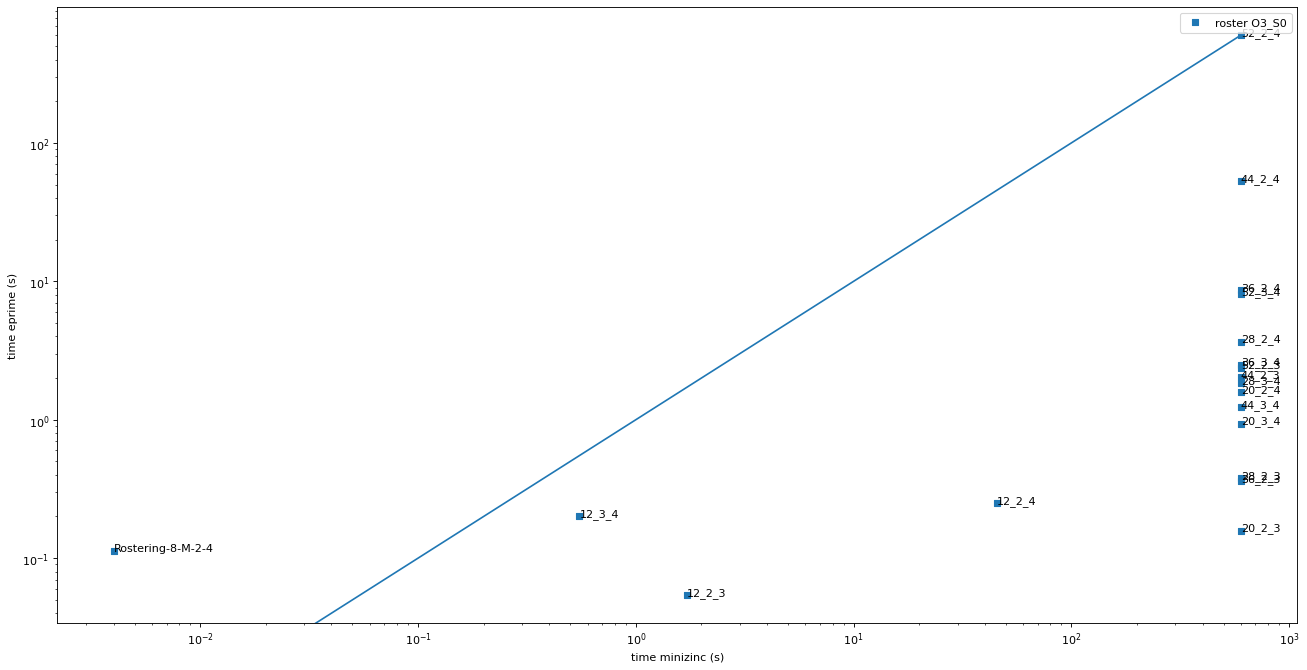

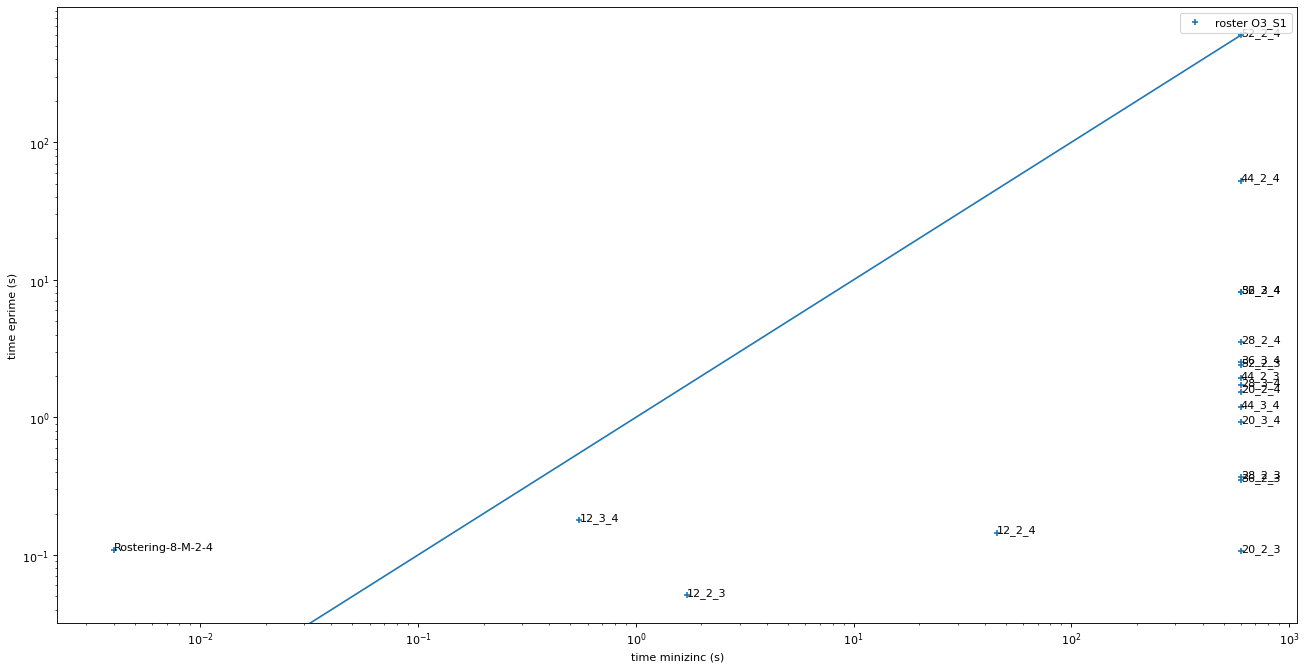

In [34]:
for i in optimisations:
    setupPlotSolverSolver()
    createPlot(i)
    plt.legend(loc="best")
# setupPlotSolverSolver()
# createPlot("O0_S0")
# plt.legend(loc="best")


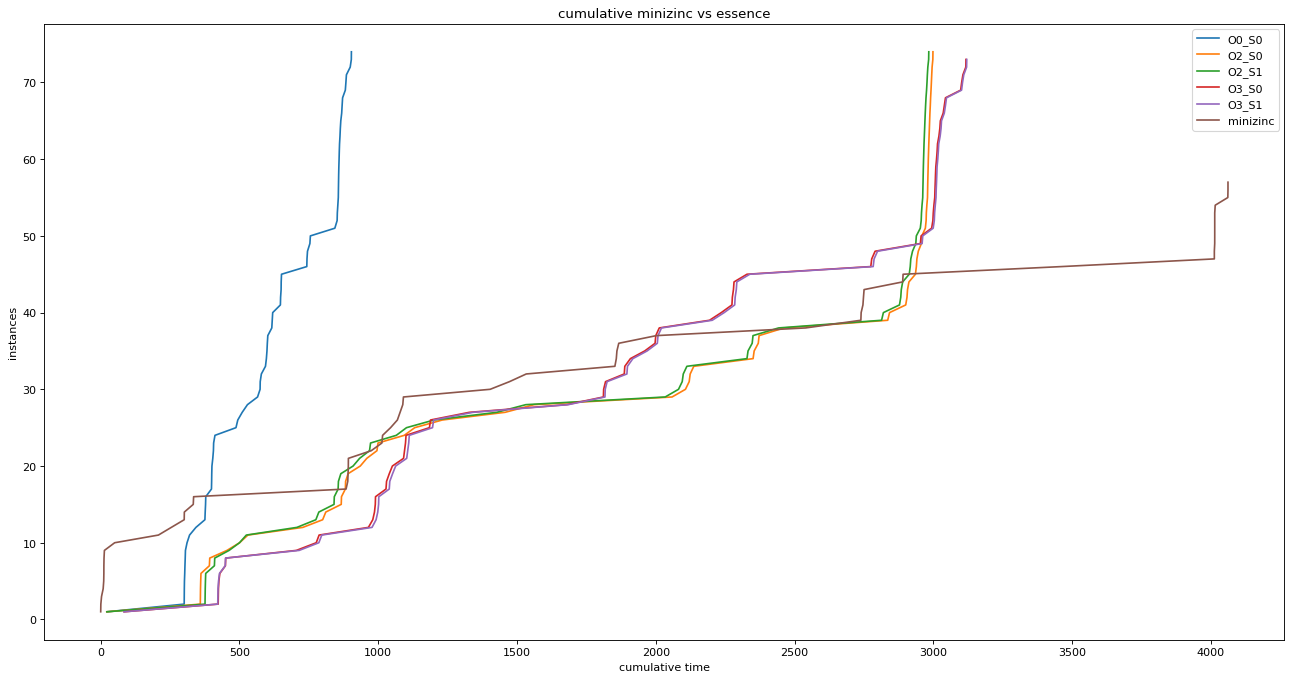

In [6]:
import numpy as np

def setupCumulativePlot(title):
    figure(figsize=(20, 10), dpi=80)
    plt.xlabel("cumulative time")
    plt.ylabel("instances")
    plt.title(title)
    # plt.yscale("log")
    # plt.xscale("log")


def plotInvValues(xValues, yValues, label):
    plt.plot(xValues, yValues, label=label)
    # plt.xlim(max(xValues), min(xValues))
    # plt.ylim(max(yValues), min(yValues))

def getTimingCompleted(i, opt=None):
    if opt != None:
        return allEprimeTimings[i][opt][timingIndex], allEprimeTimings[i][opt][timeoutIndex]
    return allMinizincTimings[i][timingIndex], allMinizincTimings[i][timeoutIndex]


def createCumulativePlot(opt=None):
    cumulativeTime = 0.0
    cumulativeInstance = 0
    xValues = []
    # listLenMap = sum([len(allEprimeTimings[j][opt][timingIndex]) for j in problems])
    # yValues = [i for i in range(1, listLenMap+1)]
    yValues = []
    for i in problems:
        timing, incomplete = getTimingCompleted(i, opt)
        for j in range(len(timing)):
            if incomplete[j]:
                continue
            cumulativeTime += timing[j]
            cumulativeInstance += 1
            xValues.append(cumulativeTime)
            yValues.append(cumulativeInstance)
    return xValues, yValues

setupCumulativePlot("cumulative minizinc vs essence")
xValues, yValues = createCumulativePlot()
for opt in optimisations:
    xEValues, yEValues = createCumulativePlot(opt)
    plotInvValues(xEValues, yEValues, opt)
plotInvValues(xValues, yValues, "minizinc")
plt.legend(loc="best")

# for opt in optimisations:
    # setupCumulativePlot(opt)
    # createCumulativePlot(opt)
